   default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB
None
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.49      0.29      0.36        69

    accuracy                           0.96      2000
   macro avg       0.73      0.64      0.67      2000
weighted avg       0.96      0

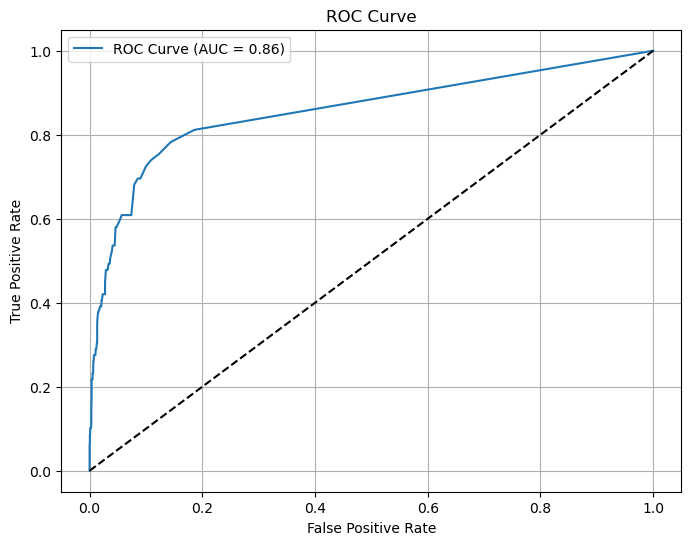

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Sample Dataset (replace with your actual dataset)
# Using UCI Credit Dataset as an example
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
df = pd.read_csv(url)

# Step 3: Explore Dataset
print(df.head())
print(df.info())

# Step 4: Preprocess Data
# Rename target column to 'target' for generality
df.rename(columns={"default": "target"}, inplace=True)

# Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 8: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
